In [1]:
import json
import math
import tikzplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, cm, colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Import data made with Julia

In [2]:
json_data = open("output.json")
data = json.load(json_data)
json_data.close()

distribution = data["distribution"]

In [3]:
with np.load('data.npz') as data:
    coord_number = data['Z']
    Energy = data['E']
    accepted = data['accepted_theta']
    rejected = data['rejected_theta']
    correlation = data['correlation']
    grid = data['grid']

In [4]:
def convert_to_patches(center, a, b, angle):
    return patches.Ellipse(self.center, 2*a, 2*b, angle=self.angle*180/math.pi)


In [5]:
# let's have fun with colours --> map energy values to color palette
my_palette = LinearSegmentedColormap.from_list('custom red', ["#577590", "#f94144", "#f8961e"], N=256)
# my_palette = LinearSegmentedColormap.from_list('custom red', ["#ffffff", "#ff0a54"], N=256)

## heatmap of energy
minima = np.round(np.min(Energy), 2)
maxima = np.round(np.max(Energy), 2)

## heatmap of coordination number
# minima = np.round(np.min(coord_number), 2)
# maxima = np.round(np.max(coord_number), 2)

norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=my_palette)

/tmp/ipykernel_506516/2783046989.py:9: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = patches.Ellipse(center, a, b, angle)
/tmp/ipykernel_506516/2783046989.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, ticks=cbar, shrink=0.85, orientation='vertical')


(0.0, 100.0)

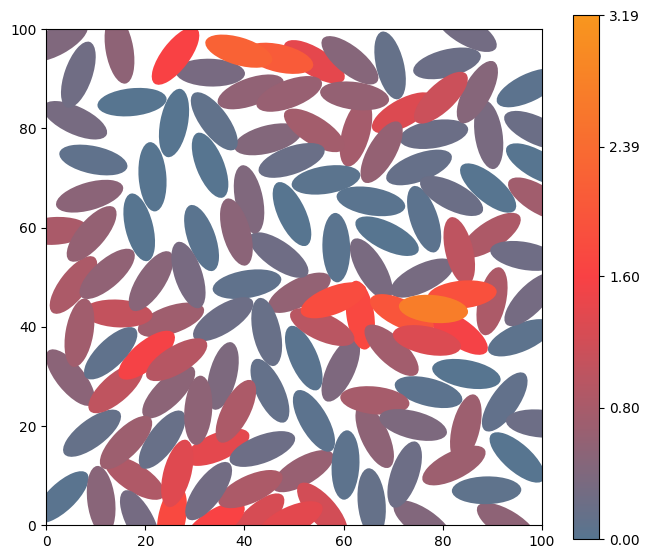

In [6]:
plt.figure(figsize=(8,8))

index = 0
for sample in distribution:
    v = Energy[-1,index]
    # v = coord_number[-1,index]

    center, a, b, angle = sample['center'], 2*sample['a'], 2*sample['b'], sample['angle']*180/math.pi
    ellipse = patches.Ellipse(center, a, b, angle)

    plt.gca().add_patch(ellipse)
    ellipse.set_facecolor(mapper.to_rgba(v))
    ellipse.set_label('_nolegend_')

    index += 1

cbar = np.round( np.linspace(minima, maxima, 5, endpoint=True), 2)
plt.colorbar(mapper, ticks=cbar, shrink=0.85, orientation='vertical')

plt.axis('scaled')
plt.xlim(0.0, grid[0])
plt.ylim(0.0, grid[1])

# tikzplotlib.save("test.tex")

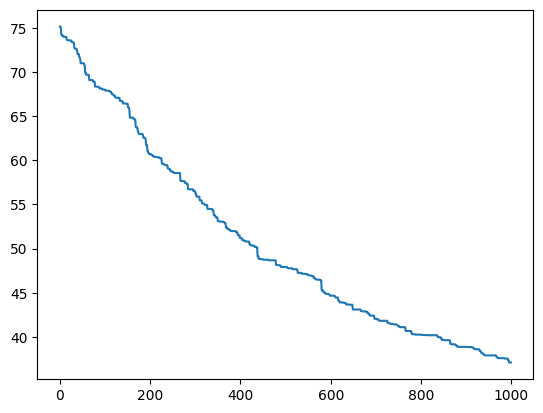

In [7]:
## check parametres
x = np.arange(len(Energy[:,0]))

## E = 1/2*u_i ---> 2x štejemo vse pare
y = 0.5*np.sum(Energy, axis=1)
plt.plot(x, y)
plt.show()

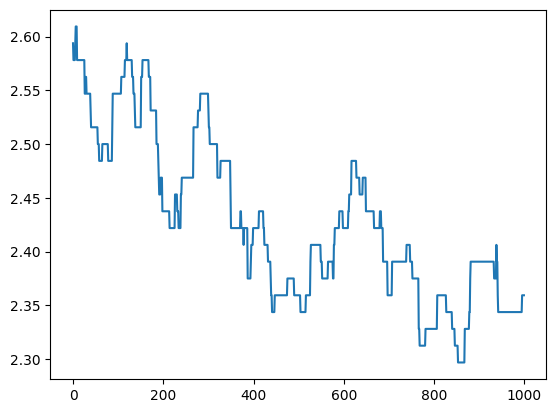

In [8]:
## Coordination numbers
x = np.arange(len(coord_number[:,0]))

## Z for one ellipse
plt.plot(x, np.sum(coord_number, axis=1)/len(coord_number[0,:]))
plt.show()

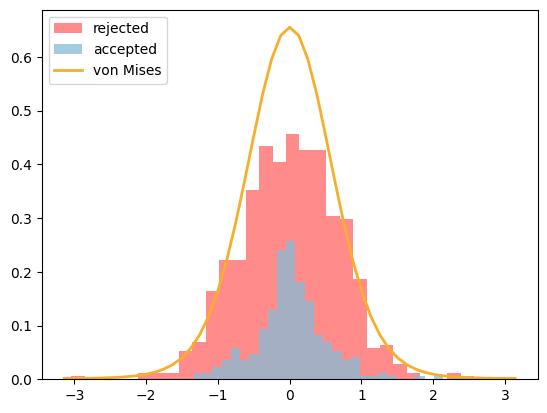

In [9]:
## histograms that have to be normalised
from scipy.special import i0


hist1, bins1 = np.histogram(accepted, bins=30)
hist2, bins2 = np.histogram(rejected, bins=30)

norm = np.sum(hist1*np.diff(bins1)) + np.sum((hist2)*np.diff(bins2))
wgt = [np.ones_like(accepted)/norm, np.ones_like(rejected)/norm]

plt.hist(rejected, bins=bins2, facecolor='#FF6663', weights=wgt[1], alpha=0.75, label='rejected')
plt.hist(accepted, bins=bins1, facecolor='#86BBD8', weights=wgt[0], alpha=0.75, label='accepted')

mu, kappa = 0, 3
x = np.linspace(-math.pi, math.pi, num=51)
y = np.exp(kappa*np.cos(x-mu))/(2*np.pi*i0(kappa))
plt.plot(x, y, linewidth=2, color='#F6AE2D', label='von Mises')
plt.legend(loc='upper left')

plt.show()

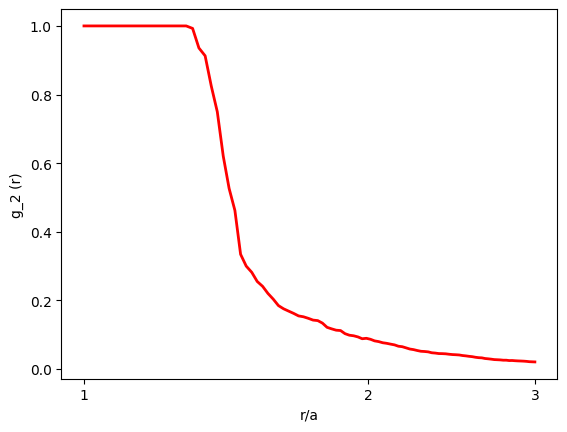

In [10]:
## Plot the correlation function
r = np.linspace(1,3, 100)
plt.plot(r, correlation, linewidth=2, color='r')

plt.xscale('log')
plt.xticks([1, 2, 3], [1, 2, 3])

plt.xlabel('r/a')
plt.ylabel('g_2 (r)')
plt.show()